<a href="https://colab.research.google.com/github/anushrao404/AIML-Internship_ElevateLabs/blob/main/29_5_25_AIML_Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📝 Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished   

🔧 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries,

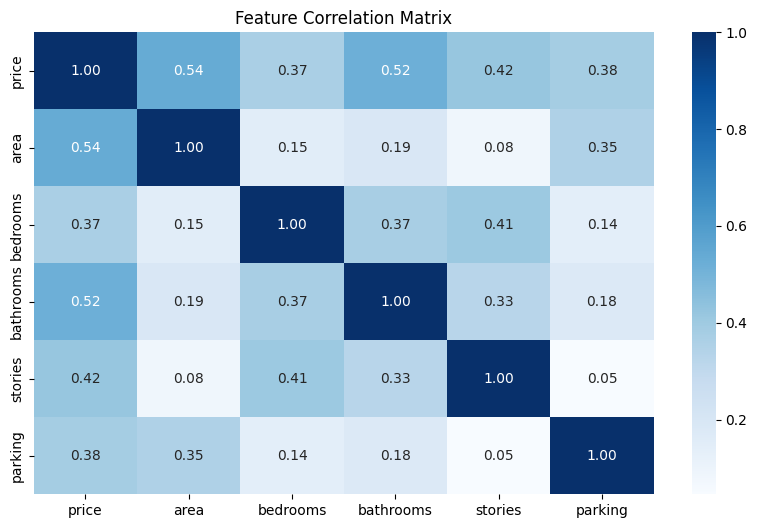

📊 Model Evaluation Metrics:
MAE:  ₹1,323,477.58
MSE:  ₹3,618,676,857,748.50
RMSE: ₹1,902,282.01
R² Score: 0.3191

📌 Regression Coefficients:
area: 397.40
Intercept: 2663519.96



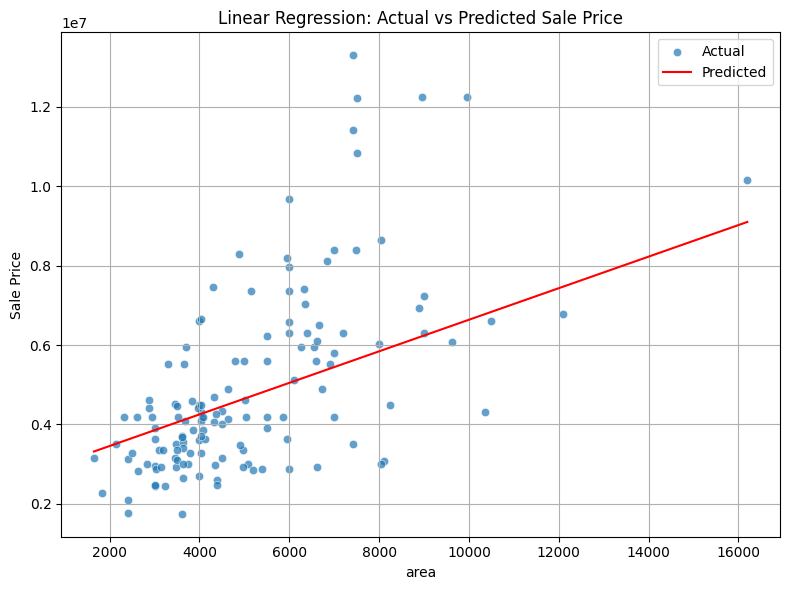

✅ Task 3: Linear Regression Complete


In [4]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 💾 Step 1: Load the Dataset
df = pd.read_csv("/content/Housing.csv")  # Replace with your actual CSV path

# 🔍 Step 2: Basic EDA
print("📝 Dataset Preview:")
print(df.head(), "\n")

print("🔧 Dataset Info:")
print(df.info(), "\n")

# Drop rows with missing values for simplicity (or use imputation)
df.dropna(inplace=True)

# ✨ Optional: Visual correlation analysis
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), cmap='Blues', annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# ======================================
# 👇 Choose features for regression model
# ======================================

# Simple Linear Regression
# Note: Ensure 'GrLivArea' and 'SalePrice' are numeric in your dataset
X = df[['area']] # Assuming 'area' is the numerical feature similar to 'GrLivArea'
y = df['price']   # Assuming 'price' is the numerical target similar to 'SalePrice'

# Uncomment for Multiple Linear Regression:
# features = ['GrLivArea', 'OverallQual', 'GarageCars'] # Update with your actual numerical feature names
# X = df[features]
# y = df['SalePrice'] # Update with your actual numerical target name

# 🧪 Step 3: Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2025
)

# 🧠 Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Step 5: Predict on test data
y_pred = model.predict(X_test)

# 🎯 Step 6: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Metrics:")
print(f"MAE:  ₹{mae:,.2f}")
print(f"MSE:  ₹{mse:,.2f}")
print(f"RMSE: ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}\n")

# 🧮 Step 7: Coefficients
print("📌 Regression Coefficients:")
# Ensure X.columns are numerical column names for the loop
if isinstance(X, pd.DataFrame):
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef:.2f}")
else:
    # Handle the case where X might be a Series (for simple linear regression)
    print(f"{X.name}: {model.coef_[0]:.2f}")

print(f"Intercept: {model.intercept_:.2f}\n")

# 📊 Step 8: Visualize Results
plt.figure(figsize=(8, 6))
# Ensure X_test has a numerical column at index 0 or select by name
if isinstance(X_test, pd.DataFrame) and len(X_test.columns) > 0:
    x_axis_data = X_test.iloc[:, 0]
    x_label = X_test.columns[0]
elif isinstance(X_test, pd.Series):
    x_axis_data = X_test
    x_label = X_test.name
else:
    # Handle potential issues if X_test is not in expected format
    x_axis_data = X_test.flatten() # Attempt to flatten if it's a numpy array
    x_label = "Feature" # Default label

sns.scatterplot(x=x_axis_data, y=y_test, label="Actual", alpha=0.7)
sns.lineplot(x=x_axis_data, y=y_pred, color="red", label="Predicted")
plt.xlabel(x_label)
plt.ylabel("Sale Price") # Update if target column name is different
plt.title("Linear Regression: Actual vs Predicted Sale Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Done
print("✅ Task 3: Linear Regression Complete")